In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv('flights.csv', header = 'infer',low_memory=False)

In [3]:
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create a copy of original data
df_original = df.copy()

In [5]:
# add DATE

df_date = pd.DataFrame({'YEAR': df.YEAR, 'MONTH': df.MONTH, 'DAY': df.DAY})
df_datetime = pd.to_datetime(df_date)
col_name = df.columns.tolist() # convert columns to list
col_name.insert(0,'DATE')
df.reindex(columns=col_name)
df['DATE'] = df_datetime # add datetime into dataframe
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [6]:
def time_format(time):
    if pd.isnull(time):
        return np.nan
    else:
        if time != 2400:
            full_time = '{:04d}'.format(int(time))
        else: # if time equals 2400, need to turn into next day's 0000
            full_time = '0000'
        result = datetime.time(int(full_time[0:2]), int(full_time[2:4]))
        return result


# convert SCHEDULED_DEPARTURE, DEPARTURE_TIME, SCHEDULED_ARRIVAL, ARRIVAL_TIME to time format
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(time_format)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(time_format)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(time_format)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(time_format)

In [7]:
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,23:59:00,...,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,23:59:00,...,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,23:59:00,...,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,23:59:00,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,23:59:00,...,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31


In [8]:
remove_list = ['MONTH','DAY','TAIL_NUMBER','TAXI_OUT','WHEELS_OFF','AIR_TIME','WHEELS_ON','TAXI_IN'
              ,'CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
              'DIVERTED','FLIGHT_NUMBER']
df.drop(remove_list, axis=1, inplace=True)
df.head()

,YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,DATE
0,2015,4,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,194.0,1448,04:30:00,04:08:00,-22.0,0,2015-01-01
1,2015,4,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,279.0,2330,07:50:00,07:41:00,-9.0,0,2015-01-01
2,2015,4,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,293.0,2296,08:06:00,08:11:00,5.0,0,2015-01-01
3,2015,4,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,281.0,2342,08:05:00,07:56:00,-9.0,0,2015-01-01
4,2015,4,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,215.0,1448,03:20:00,02:59:00,-21.0,0,2015-01-01


In [9]:
df.dropna(inplace = True)

In [10]:
df_cargo = pd.read_csv('cy16-commercial-service-enplanements.csv', header = 'infer')

In [11]:
df_cargo.head()

,Rank,RO,ST,Locid,City,Airport Name,S/L,Hub,CY 16 Enplanements,CY 15 Enplanements,% Change
0,1.0,SO,GA,ATL,Atlanta,Hartsfield - Jackson Atlanta International,P,L,"50,501,858","49,340,732",2.35%
1,2.0,WP,CA,LAX,Los Angeles,Los Angeles International,P,L,"39,636,042","36,351,272",9.04%
2,3.0,GL,IL,ORD,Chicago,Chicago O'Hare International,P,L,"37,589,899","36,305,668",3.54%
3,4.0,SW,TX,DFW,Fort Worth,Dallas-Fort Worth International,P,L,"31,283,579","31,589,839",-0.97%
4,5.0,EA,NY,JFK,New York,John F Kennedy International,P,L,"29,239,151","27,782,369",5.24%


In [12]:
df_cargo.dropna(inplace = True)
enp = df_cargo['CY 15 Enplanements']
enp_new = []
for i in enp.tolist():
    result = i.replace(',','')
    result = float(result)
    enp_new.append(result)
df_cargo['CY 15 Enplanements'] = enp_new
df_cargo.head()


,Rank,RO,ST,Locid,City,Airport Name,S/L,Hub,CY 16 Enplanements,CY 15 Enplanements,% Change
0,1.0,SO,GA,ATL,Atlanta,Hartsfield - Jackson Atlanta International,P,L,"50,501,858",49340732.0,2.35%
1,2.0,WP,CA,LAX,Los Angeles,Los Angeles International,P,L,"39,636,042",36351272.0,9.04%
2,3.0,GL,IL,ORD,Chicago,Chicago O'Hare International,P,L,"37,589,899",36305668.0,3.54%
3,4.0,SW,TX,DFW,Fort Worth,Dallas-Fort Worth International,P,L,"31,283,579",31589839.0,-0.97%
4,5.0,EA,NY,JFK,New York,John F Kennedy International,P,L,"29,239,151",27782369.0,5.24%


In [13]:
df_cargo['CY 15 Enplanements'].describe()

count    5.060000e+02
mean     1.579527e+06
std      5.127111e+06
min      9.300000e+01
25%      9.675750e+03
50%      6.940500e+04
75%      4.350670e+05
max      4.934073e+07
Name: CY 15 Enplanements, dtype: float64

In [14]:
p90 = np.percentile(df_cargo['CY 15 Enplanements'], 90)
p75 = np.percentile(df_cargo['CY 15 Enplanements'], 75)
p50 = np.percentile(df_cargo['CY 15 Enplanements'],50)
p20 = np.percentile(df_cargo['CY 15 Enplanements'],20)

In [15]:
def get_lvl(amount):
    if amount > p90:
        return 'Ultra'
    elif p75 < amount <= p90:
        return 'Large'
    elif p50 < amount <= p75:
        return 'Medium'
    else:
        return 'Small'
    
df_cargo['Level'] = df_cargo['CY 15 Enplanements'].apply(get_lvl)

In [16]:
df_cargo = df_cargo[['Locid', 'Level']]

In [17]:
df_cargo.head()

,Locid,Level
0,ATL,Ultra
1,LAX,Ultra
2,ORD,Ultra
3,DFW,Ultra
4,JFK,Ultra


In [18]:
# the function for overall stats
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

In [19]:
def airport_delay_percent(airport, df = df):
    df_airport = df[ df['ORIGIN_AIRPORT'] == airport ]
    delay_airport_count = df_airport[ df_airport['DEPARTURE_DELAY'] != 0 ]
    result = delay_airport_count.shape[0] / df_airport.shape[0]
    return result

In [20]:
airport_delay_percent('ORD')

0.9418522241587538

In [21]:
airport_delay_percent('DTW')

0.9408180050844923

In [22]:
list_airport = df['ORIGIN_AIRPORT'].unique()

In [23]:
avg_airport_delay = df.groupby(['ORIGIN_AIRPORT'])['DEPARTURE_DELAY'].mean()

In [24]:
avg_airport_delay = avg_airport_delay.sort_values(ascending = False)

In [25]:
# dataframe for average delay time of each departure airport
df_avg_airport_delay = pd.DataFrame({"Average delay time":avg_airport_delay })

In [26]:
df_avg_airport_delay.head()

,Average delay time
ORIGIN_AIRPORT,
14222,89.111111
ILG,29.568421
13964,28.843750
MVY,25.907317
HYA,23.182927


In [27]:
df_avg_airport_delay['Airport'] = df_avg_airport_delay.index

In [28]:
new = df_avg_airport_delay[df_avg_airport_delay['Airport'].isin(['ORD','DTW'])]

In [29]:
new

,Average delay time,Airport
ORIGIN_AIRPORT,,
ORD,14.033679,ORD
DTW,9.092624,DTW


In [30]:
# read airports 
df_airports = pd.read_csv('airports.csv', header = 'infer')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [31]:
# eliminate the airports which are not in the airports database

list_airports = df_airports['IATA_CODE'].tolist()

# update the dataframe of avg delay time for each airport
df_avg_airport_delay = df_avg_airport_delay[df_avg_airport_delay['Airport'].isin(list_airports)].copy()

In [32]:
df_avg_airport_delay.head()

,Average delay time,Airport
ORIGIN_AIRPORT,,
ILG,29.568421,ILG
MVY,25.907317,MVY
HYA,23.182927,HYA
STC,18.389610,STC
OTH,17.806818,OTH


In [33]:
full_avg_airport_delay = pd.merge(df_avg_airport_delay,df_airports, left_on = 'Airport', right_on = 'IATA_CODE' )

In [34]:
full_avg_airport_delay = pd.merge(full_avg_airport_delay, df_cargo, 'left',left_on = 'IATA_CODE', right_on = 'Locid')

In [35]:
# the updated dataframe which includes the geo info of the airport and level of the airport
full_avg_airport_delay.head()

,Average delay time,Airport,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Locid,Level
0,29.568421,ILG,ILG,Wilmington Airport,Wilmington,DE,USA,39.67872,-75.60653,NaN,NaN
1,25.907317,MVY,MVY,Martha's Vineyard Airport,Marthas Vineyard,MA,USA,41.39303,-70.61433,MVY,Small
2,23.182927,HYA,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036,HYA,Small
3,18.389610,STC,STC,St. Cloud Regional Airport,St Cloud,MN,USA,45.54532,-94.05834,STC,Small
4,17.806818,OTH,OTH,Southwest Oregon Regional Airport (North Bend ...,North Bend,OR,USA,43.41714,-124.24603,OTH,Small


In [36]:
import plotly.plotly as py

In [37]:
# display the average delay time per airport on the map by plotly

# aad = average airport delay
aad = full_avg_airport_delay.copy()
aad['text'] = aad['IATA_CODE'] + '<br>' + aad['CITY'] + '<br>Airport Level: ' + aad['Level'] + '<br>Average delay time ' + aad['Average delay time'].astype(str) + ' minutes'
limits = [(0,5), (6,15), (16, 30), (31, 60), (60, 321)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
airports = []
scale = 1

for i in range(len(limits)):
    lim = limits[i]
    aad_sub  = aad[lim[0]:lim[1]]
    airport = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = aad_sub['LONGITUDE'],
        lat = aad_sub['LATITUDE'],
        text = aad_sub['text'],
        marker = dict(
            size = aad_sub['Average delay time']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = 'Ranking {0} - {1}'.format(lim[0]+1, lim[1]+1)
    )
    airports.append(airport)
    
layout = dict(
        title = '2015 US Average delay time (Departure Airport)<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict(data = airports, layout = layout)
py.iplot(fig, validate = False, filename = 'bubble-map-avg-delay-airport')

    




In [38]:
# calculate the percent of flight delays for each airport
list_airport_percent = []
for i in full_avg_airport_delay['Airport'].tolist():
    list_airport_percent.append(airport_delay_percent(i))


In [39]:
# pda = percent of flight delays for each airport

pda = full_avg_airport_delay.copy()
pda['percent of flight delays'] = list_airport_percent



In [40]:
pda = pda.sort_values('percent of flight delays', ascending = False)

In [41]:
#pda.drop(['text'],axis=1, inplace=True)
pda.head()

,Average delay time,Airport,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Locid,Level,percent of flight delays
6,17.184971,CEC,CEC,Del Norte County Airport (Jack McNamara Field),Crescent City,CA,USA,41.78016,-124.23653,CEC,Small,0.994220
54,10.409091,ADK,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603,NaN,NaN,0.988636
277,2.953775,WRG,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,WRG,Small,0.987673
239,5.243671,ORH,ORH,Worcester Regional Airport,Worcester,MA,USA,42.26734,-71.87571,ORH,Small,0.985759
155,7.617117,MEI,MEI,Meridian Regional Airport,Meridian,MS,USA,32.33313,-88.75121,MEI,Small,0.985360


In [42]:
# display the percent of flight delays per airport on the map by plotly


pda['text'] = pda['IATA_CODE'] + '<br>' + pda['CITY'] + '<br>Airport Level: ' + pda['Level'] + '<br>Percent of flight delays ' + pda['percent of flight delays'].astype(str)
limits = [(0,5), (6,15), (16, 30), (31, 60), (60, 321)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
airports_2 = []
scale = 100

for i in range(len(limits)):
    lim = limits[i]
    pda_sub  = pda[lim[0]:lim[1]]
    airport = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = pda_sub['LONGITUDE'],
        lat = pda_sub['LATITUDE'],
        text = pda_sub['text'],
        marker = dict(
            size = pda_sub['percent of flight delays']*scale/3,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = 'Ranking {0} - {1}'.format(lim[0]+1, lim[1]+1)
    )
    airports_2.append(airport)
    
layout_2 = dict(
        title = '2015 US Percent of flight delays (Departure Airport)<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(255, 255, 255)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(217, 217, 217)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig_2 = dict(data = airports_2, layout = layout_2)
py.iplot(fig_2, validate = False, filename = 'bubble-map-percent-delay-airport')

In [43]:
# calculate the percent of flight cancellation for each airport
def airport_cancel_percent(airport, df = df_original):
    df_airport = df[ df['ORIGIN_AIRPORT'] == airport ]
    cancel_airport_count = df_airport['CANCELLED'].sum()
    result = cancel_airport_count / df_airport.shape[0]
    return result


list_airport_percent_cancel = []
for i in full_avg_airport_delay['Airport'].tolist():
    list_airport_percent_cancel.append(airport_cancel_percent(i))

In [44]:
# pca = percent of cancellation for each airport
pca = full_avg_airport_delay.copy()
pca['Cancellation rate'] = list_airport_percent_cancel
pca.head()


,Average delay time,Airport,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Locid,Level,Cancellation rate
0,29.568421,ILG,ILG,Wilmington Airport,Wilmington,DE,USA,39.67872,-75.60653,NaN,NaN,0.050000
1,25.907317,MVY,MVY,Martha's Vineyard Airport,Marthas Vineyard,MA,USA,41.39303,-70.61433,MVY,Small,0.000000
2,23.182927,HYA,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036,HYA,Small,0.012048
3,18.389610,STC,STC,St. Cloud Regional Airport,St Cloud,MN,USA,45.54532,-94.05834,STC,Small,0.060241
4,17.806818,OTH,OTH,Southwest Oregon Regional Airport (North Bend ...,North Bend,OR,USA,43.41714,-124.24603,OTH,Small,0.036364


In [45]:
# display the percent flight cancellation per airport on the map by plotly


pca['text'] = pca['IATA_CODE'] + '<br>' + pca['CITY'] + '<br>Airport Level: ' + pca['Level'] + '<br>Percent of flight cancellation ' + pca['Cancellation rate'].astype(str)
limits = [(0,5), (6,15), (16, 30), (31, 60), (60, 321)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
airports_3 = []
scale = 200

for i in range(len(limits)):
    lim = limits[i]
    pca_sub  = pca[lim[0]:lim[1]]
    airport = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = pca_sub['LONGITUDE'],
        lat = pca_sub['LATITUDE'],
        text = pca_sub['text'],
        marker = dict(
            size = pca_sub['Cancellation rate']*scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = 'Ranking {0} - {1}'.format(lim[0]+1, lim[1]+1)
    )
    airports_3.append(airport)
    
layout_3 = dict(
        title = '2015 US Percent of flight cancellation (Departure Airport)<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(255, 255, 255)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(217, 217, 217)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig_3 = dict(data = airports_3, layout = layout_3)
py.iplot(fig_3, validate = False, filename = 'bubble-map-percent-cancellation-airport')

In [46]:
mean_delay_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean()
mean_delay_airline

AIRLINE
AA     8.826106
AS     1.718926
B6    11.442467
DL     7.313300
EV     8.615598
F9    13.303352
HA     0.469918
MQ     9.967187
NK    15.883101
OO     7.736083
UA    14.333056
US     6.081000
VX     8.993486
WN    10.517183
Name: DEPARTURE_DELAY, dtype: float64

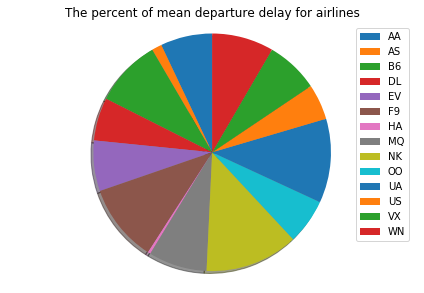

In [47]:
labels = mean_delay_airline.index
values = mean_delay_airline

#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(values, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('The percent of mean departure delay for airlines')
plt.show()

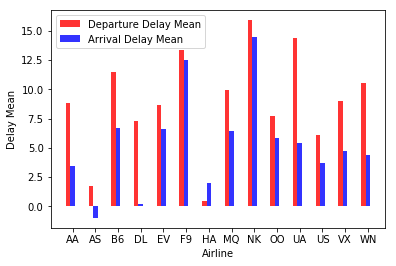

In [48]:
# Comparison between departure delay and arrival delay
departure_delay_mean = df['DEPARTURE_DELAY'].groupby(df['AIRLINE']).mean()
arrival_delay_mean = df['ARRIVAL_DELAY'].groupby(df['AIRLINE']).mean()

# Bar chart for the Departure & Arrival Delay Mean
groups = arrival_delay_mean.count()

list_d = departure_delay_mean.tolist()
list_a = arrival_delay_mean.tolist()
index = np.arange(groups)
bar_width = 0.2
opacity = 0.8

bar_d = plt.bar(index,  list_d, bar_width, alpha=opacity, color = 'r', label = 'Departure Delay Mean')
bar_a = plt.bar(index + bar_width,  list_a, bar_width, alpha=opacity, color = 'b', label = 'Arrival Delay Mean')

plt.xlabel('Airline')
plt.ylabel('Delay Mean')
#plt.title('The mean of delay by airlines')
plt.xticks(index + bar_width, arrival_delay_mean.index.tolist())
plt.legend()

plt.show()

In [49]:
# It is comman for civil aviation that if they don't depart on time, they will adjust the flight speed
# and try to get the destination as soon as possible (prerequiste : enough gas)
# Since this situation, the arrival delay mean can not necessarily reflect the actual delay.
# The analysis will focus on the departure delay

In [50]:
# Model Building

def data_split(time):
    if ( time.date() < datetime.date(2015,2,15)):
        return True
    else:
        return False
    
df_s = df[df['DATE'].apply(data_split)]

In [51]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
def linear_regr(X_train, Y_train, X_test, Y_test):
    #X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    #y_pred_train = regr.predict(X_train)
    y_pred_test = regr.predict(X_test)
    #print("Root mean squared error (train)= %.4f" % np.sqrt(mean_squared_error(Y_train, y_pred_train)))
    print("Root mean squared error (test)= %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
    return y_pred_test, Y_test, np.sqrt(mean_squared_error(Y_test, y_pred_test))

In [52]:
def ridgecv_regr(X_train, Y_train, X_test, Y_test):
    #X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    ridge = linear_model.RidgeCV(cv=10, alphas=[0.2, 0.4, 0.6, 0.8, 1.0])
    ridge.fit(X_train, Y_train)
    #y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)
    #print("Root mean squared error (train)= %.4f" % np.sqrt(mean_squared_error(Y_train, y_pred_train)))
    print("Root mean squared error (test)= %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
    return y_pred_test, Y_test, np.sqrt(mean_squared_error(Y_test, y_pred_test))
    

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score  
def poly_regr(X_train, Y_train, X_test, Y_test):
    degrees = np.arange(1,10)
    #X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    for deg in degrees:
        poly = PolynomialFeatures(degree=deg, include_bias=False)  
        X_train_poly = poly.fit_transform(X_train)
        poly_reg = linear_model.LinearRegression()
        poly_reg.fit(X_train_poly, Y_train)
        X_test_poly = poly.fit_transform(X_test)  
        Y_test_pred = poly_reg.predict(X_test_poly)
        poly_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
        r2score = r2_score(Y_test, Y_test_pred)
        print("degree: {}".format(deg))
        print("Root mean squared error (test)= %.4f" % poly_rmse)
        print("r2score = {}".format(r2score))

In [54]:
def lassocv_regr(X_train, Y_train, X_test, Y_test):
    #X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    lasso = linear_model.LassoCV(cv=10, alphas=[0.2, 0.4, 0.6, 0.8, 1.0, 2.0, 2.5])
    lasso.fit(X_train, Y_train)
    #y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)
    #print("Root mean squared error (train)= %.4f" % np.sqrt(mean_squared_error(Y_train, y_pred_train)))
    print("Root mean squared error (test)= %.4f" % np.sqrt(mean_squared_error(Y_test, y_pred_test)))
    return y_pred_test, Y_test, np.sqrt(mean_squared_error(Y_test, y_pred_test))
    

In [55]:
df_s.head()

,YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,DATE
0,2015,4,AS,ANC,SEA,00:05:00,23:54:00,-11.0,205.0,194.0,1448,04:30:00,04:08:00,-22.0,0,2015-01-01
1,2015,4,AA,LAX,PBI,00:10:00,00:02:00,-8.0,280.0,279.0,2330,07:50:00,07:41:00,-9.0,0,2015-01-01
2,2015,4,US,SFO,CLT,00:20:00,00:18:00,-2.0,286.0,293.0,2296,08:06:00,08:11:00,5.0,0,2015-01-01
3,2015,4,AA,LAX,MIA,00:20:00,00:15:00,-5.0,285.0,281.0,2342,08:05:00,07:56:00,-9.0,0,2015-01-01
4,2015,4,AS,SEA,ANC,00:25:00,00:24:00,-1.0,235.0,215.0,1448,03:20:00,02:59:00,-21.0,0,2015-01-01


In [56]:
df_s = df_s.drop(['DEPARTURE_TIME', 'ELAPSED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME','CANCELLED', 'ARRIVAL_DELAY']
                ,axis = 1)

In [57]:
df_s.head()

,YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DATE
0,2015,4,AS,ANC,SEA,00:05:00,-11.0,205.0,2015-01-01
1,2015,4,AA,LAX,PBI,00:10:00,-8.0,280.0,2015-01-01
2,2015,4,US,SFO,CLT,00:20:00,-2.0,286.0,2015-01-01
3,2015,4,AA,LAX,MIA,00:20:00,-5.0,285.0,2015-01-01
4,2015,4,AS,SEA,ANC,00:25:00,-1.0,235.0,2015-01-01


In [58]:
df_s.describe()

,YEAR,DAY_OF_WEEK,DEPARTURE_DELAY,SCHEDULED_TIME
count,658747.0,658747.000000,658747.000000,658747.000000
mean,2015.0,4.010242,9.423751,140.220683
std,0.0,1.931755,36.576138,74.722879
min,2015.0,1.000000,-48.000000,23.000000
25%,2015.0,2.000000,-5.000000,85.000000
50%,2015.0,4.000000,-2.000000,122.000000
75%,2015.0,6.000000,8.000000,173.000000
max,2015.0,7.000000,1988.000000,718.000000


In [59]:
from sklearn.model_selection import train_test_split
df_s['scheduled_time'] = df_s['SCHEDULED_DEPARTURE'].apply(lambda x:x.hour*3600+x.minute*60+x.second)

In [60]:
# Since some attributes are not numeric, OneHotEncoder will be applied on those attributes
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ndata = np.array(df_s)
n_airline = LabelEncoder().fit_transform(ndata[:, 2]).reshape(-1,1)
n_d_airport = LabelEncoder().fit_transform(ndata[:,3]).reshape(-1,1)
n_a_airport = LabelEncoder().fit_transform(ndata[:,4]).reshape(-1,1)

df_s['AIRLINE'] = n_airline
df_s['ORIGIN_AIRPORT'] = n_d_airport
df_s['DESTINATION_AIRPORT'] = n_a_airport

df_s.head()

,YEAR,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DATE,scheduled_time
0,2015,4,1,15,270,00:05:00,-11.0,205.0,2015-01-01,300
1,2015,4,0,169,228,00:10:00,-8.0,280.0,2015-01-01,600
2,2015,4,11,270,64,00:20:00,-2.0,286.0,2015-01-01,1200
3,2015,4,0,169,197,00:20:00,-5.0,285.0,2015-01-01,1200
4,2015,4,1,269,15,00:25:00,-1.0,235.0,2015-01-01,1500


In [61]:
categAttr = df_s[['DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT']]
categAttr.head()

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT
0,4,1,15
1,4,0,169
2,4,11,270
3,4,0,169
4,4,1,269


In [62]:
encoder = OneHotEncoder() # create encoder object
categAttr_en = encoder.fit_transform(categAttr)

In [63]:
from scipy import sparse
scalingAttr = df_s['scheduled_time']
scalingAttr_sparse = sparse.csr_matrix(scalingAttr)

# integrate the numeric attribute and categorical attributes
scalingAttr_sparse = scalingAttr_sparse.T
X_final = sparse.hstack((scalingAttr_sparse, categAttr_en))
Y_final = df_s['DEPARTURE_DELAY']

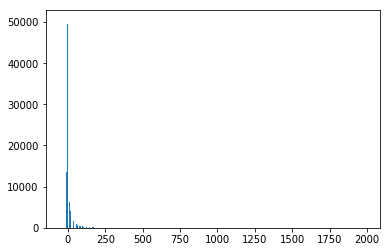

In [64]:
# Histogram for data selected
%matplotlib inline
plt.hist(df_s['DEPARTURE_DELAY'], bins = 'auto')
plt.show()

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=1)
result_1 = linear_regr(X_train, Y_train, X_test, Y_test)

# create a table for displaying the result from different models
columns = ['Model', 'Predictors','Root MSE', 'Comment']
values1 = ['Linear Regr', 'DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT', result_1[2], 'All data']
table = pd.DataFrame([values1], columns = columns)
table

Root mean squared error (test)= 36.2605


,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data


In [66]:
result_2 = lassocv_regr(X_train, Y_train, X_test, Y_test)
values2 = ['LassoCV Regr','DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT', result_2[2], 'All data']
item_2 = pd.DataFrame([values2], columns = columns)
table = pd.concat([table, item_2])

Root mean squared error (test)= 36.4288


In [67]:
# Since it has the right skewed distribution, some actions will be taken to alleviate the skewness

In [68]:
# Find outliers by calculating Z-score
delay = df_s['DEPARTURE_DELAY']
delay_mean = delay.mean()
delay_std = delay.std()

def split_outlier(delay , mean = delay_mean, std = delay_std):
    if (delay - mean) / std > 2:
        return False
    else: 
        return True

df_s= df_s[df_s['DEPARTURE_DELAY'].apply(split_outlier)].copy()

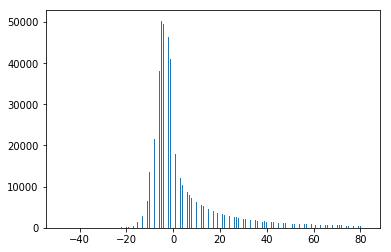

In [69]:
# Updated histogram after eliminating outliers
plt.hist(df_s['DEPARTURE_DELAY'], bins = 'auto')
plt.show()

In [70]:
def get_final_xy(df):
    categAttr = df[['DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT']]
    encoder = OneHotEncoder()
    categAttr_en = encoder.fit_transform(categAttr)
    scalingAttr = df['scheduled_time']
    scalingAttr_sparse = sparse.csr_matrix(scalingAttr)
    scalingAttr_sparse = scalingAttr_sparse.T
    X_final = sparse.hstack((scalingAttr_sparse, categAttr_en))
    Y_final = df['DEPARTURE_DELAY']
    return X_final, Y_final

In [71]:
X_final, Y_final = get_final_xy(df_s)

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=1)
result_3 = linear_regr(X_train, Y_train, X_test, Y_test)
values3 = ['Linear Regr','DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT', result_3[2], 'Outliers Eliminated' ]
item_3 = pd.DataFrame([values3], columns = columns)
table = pd.concat([table, item_3])

Root mean squared error (test)= 16.0767


In [73]:
table

,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.428846,All data
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.076676,Outliers Eliminated


In [74]:
result_4 = lassocv_regr(X_train, Y_train, X_test, Y_test)
values4 = ['LassoCV Regr','DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT', result_4[2], 'Outliers Eliminated' ]
item_4 = pd.DataFrame([values4], columns = columns)
table = pd.concat([table, item_4])
table

Root mean squared error (test)= 16.2921


,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.428846,All data
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.076676,Outliers Eliminated
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.292141,Outliers Eliminated


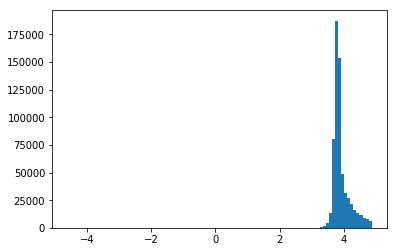

In [75]:
# Apply the log transformation to thed dataset
# Since there are some negative values, they will be added to be positive

# Get the min of values
delay_min = Y_final.min()
adder = np.abs(delay_min) + 0.01
Y_final_log = np.log(Y_final + adder)

# Updated histogram after log transformation
plt.hist(Y_final_log, bins = 100)
plt.show()

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final_log, test_size=0.3, random_state=1)
result_5 = linear_regr(X_train, Y_train, X_test, Y_test)

# Transform y-value back to the real true
y_pred_true = np.exp(result_5[0])-adder
y_true = np.exp(result_5[1]) - adder
error = np.sqrt(mean_squared_error(y_true, y_pred_true))

values5 = ['Linear Regr','DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT', error, 'Outliers Eliminated, Log Transformation' ]
item_5 = pd.DataFrame([values5], columns = columns)
table = pd.concat([table, item_5])
table


Root mean squared error (test)= 0.2481


,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.428846,All data
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.076676,Outliers Eliminated
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.292141,Outliers Eliminated
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.189995,"Outliers Eliminated, Log Transformation"


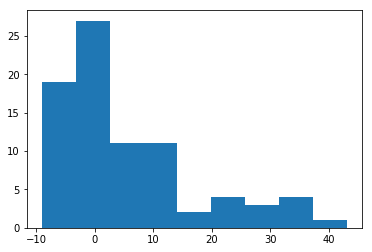

In [77]:
# Specify the airline and the airport to build the model
def get_flight_delays(df, carrier, id_airport):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)].copy()
    #_______________________________________
    # remove extreme values before fitting
    #if extrem_values:
    #    df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
    #    df2.dropna(how = 'any')
        
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['scheduled_time']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    return test2

# Get the delay information of 'UA' in 'ORD'
df_e = get_flight_delays(df_s, 10, 228)
plt.hist(df_e['mean'], bins = 'auto')
plt.show()

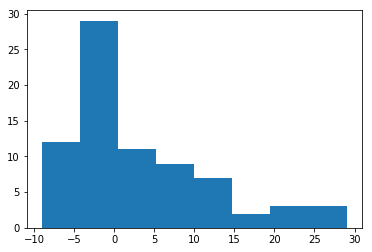

In [78]:
# Eliminate the outliers
df_e_2 = df_e[np.abs((df_e['mean'] - df_e['mean'].mean()) / df_e['mean'].std())<2]
plt.hist(df_e_2['mean'], bins = 'auto')
plt.show()


In [79]:
X_final = np.array(df_e_2['scheduled_time'].values.reshape(df_e_2.shape[0],1))
Y_final = np.array(df_e_2['mean'].values.reshape(df_e_2.shape[0],1))

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.3, random_state=1)
result_6 = linear_regr(X_train, Y_train, X_test, Y_test)
values6 = ['Linear Regr','Scheduled Time', result_6[2], 'One Airline One Airport(Specified)' ]
item_6 = pd.DataFrame([values6], columns = columns)
table = pd.concat([table, item_6])
table

Root mean squared error (test)= 6.6324


,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.428846,All data
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.076676,Outliers Eliminated
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.292141,Outliers Eliminated
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.189995,"Outliers Eliminated, Log Transformation"
0,Linear Regr,Scheduled Time,6.632369,One Airline One Airport(Specified)


In [81]:
poly_regr(X_train, Y_train, X_test, Y_test)

degree: 1
Root mean squared error (test)= 6.6324
r2score = 0.25433140476072713
degree: 2
Root mean squared error (test)= 6.9805
r2score = 0.17398974814040002
degree: 3
Root mean squared error (test)= 7.1038
r2score = 0.14456809451746333
degree: 4
Root mean squared error (test)= 7.2022
r2score = 0.12070388099770413
degree: 5
Root mean squared error (test)= 7.2289
r2score = 0.11416442486617695
degree: 6
Root mean squared error (test)= 7.1501
r2score = 0.1333675931260504
degree: 7
Root mean squared error (test)= 7.0113
r2score = 0.16668515971511244
degree: 8
Root mean squared error (test)= 6.8917
r2score = 0.19488910242480917
degree: 9
Root mean squared error (test)= 6.8474
r2score = 0.2051950189271179


In [82]:
values7 = ['Poly Regr','Scheduled Time', 6.6324, 'One Airline One Airport(Specified), Degree 1' ]
item_7  =pd.DataFrame([values7], columns = columns)
table = pd.concat([table, item_7])
table

,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.428846,All data
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.076676,Outliers Eliminated
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.292141,Outliers Eliminated
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.189995,"Outliers Eliminated, Log Transformation"
0,Linear Regr,Scheduled Time,6.632369,One Airline One Airport(Specified)
0,Poly Regr,Scheduled Time,6.632400,"One Airline One Airport(Specified), Degree 1"


In [83]:
# Apply log transmation
delay_min = Y_final.min()
adder = np.abs(delay_min) + 0.01
Y_final_log = np.log(Y_final + adder)

X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final_log, test_size=0.3, random_state=1)
result_5 = linear_regr(X_train, Y_train, X_test, Y_test)

# Transform y-value back to the real true
y_pred_true = np.exp(result_5[0])-adder
y_true = np.exp(result_5[1]) - adder
error = np.sqrt(mean_squared_error(y_true, y_pred_true))
values8 = ['Linear Regr', 'Scheduled Time', error, 'One Airline One Airport(Specified), Log']
item_8  =pd.DataFrame([values8], columns = columns)
table = pd.concat([table, item_8])
table

Root mean squared error (test)= 0.6344


,Model,Predictors,Root MSE,Comment
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.260481,All data
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",36.428846,All data
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.076676,Outliers Eliminated
0,LassoCV Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.292141,Outliers Eliminated
0,Linear Regr,"DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT",16.189995,"Outliers Eliminated, Log Transformation"
0,Linear Regr,Scheduled Time,6.632369,One Airline One Airport(Specified)
0,Poly Regr,Scheduled Time,6.632400,"One Airline One Airport(Specified), Degree 1"
0,Linear Regr,Scheduled Time,7.473959,"One Airline One Airport(Specified), Log"
